In [7]:
#datetime오브젝트
from datetime import datetime 

In [8]:
#now, today메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있다. 
now1 = datetime.now()
print(now1)

2020-03-06 11:44:11.920422


In [9]:
now2 = datetime.today()
print(now2)

2020-03-06 11:44:25.365424


In [10]:
#now메서드는 밀리세컨드까지 구합니다. 
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)
print(t1)
print(t2)
print(t3)

2020-03-06 11:45:03.708422
1970-01-01 00:00:00
1970-12-12 13:24:34


In [11]:
#datetime오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점입니다. 
diff1 = t1 - t2 
print(diff1)
print(type(diff1))

18327 days, 11:45:03.708422
<class 'datetime.timedelta'>


In [12]:
diff2 = t2 - t1 
print(diff2)
print(type(diff2))

-18328 days, 12:14:56.291578
<class 'datetime.timedelta'>


In [13]:
#datetime오브젝트로 변환하기 - to_datetime메서드
#경우에 따라서는 시계열 데이터를 문자열로 저장해야 할 때도 있습니다. 
#하지만 문자열은 시간 계산을 할 수 없기 때문에 datetime오브젝트로 변환해 주어야 합니다.
#이번에는 to_datetime메서드를 사용하여 문자열을 datetime오브젝트로 변환하는 방법을
#살펴봅니다. 
#먼저 ebola데이터 집합을 불러옵니다.
import pandas as pd 
import os 
ebola = pd.read_csv("c:\\work\\country_timeseries.csv")

In [14]:
#ebola데이터프레임을 보면 문자열로 저장된 Date열이 있는 것을 알 수 있습니다. 
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.3+ KB
None


In [15]:
#to_datetime메서드를 사용하면 Date열의 자료형을 datetime오브젝트로 변환할 수 있습니다.
ebola["date_dt"] = pd.to_datetime(ebola["Date"])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [19]:
#to_datetime메서드를 좀 더 자세히 살펴볼까요? 시간 형식 지정자(%d, %m, %y)와 
#기호(/,-)를 적절히 조합하여 format메서드에 전달하면 그 형식에 맞게 정리된
#datetime오브젝트를 얻을 수 있습니다. 
test_df1 = pd.DataFrame({"order_day":["03/03/20","03/04/20","03/05/20"]})

test_df1["date_dt1"] = pd.to_datetime(test_df1["order_day"], format="%y/%m/%d")
test_df1["date_dt2"] = pd.to_datetime(test_df1["order_day"], format="%m/%d/%y")
test_df1["date_dt3"] = pd.to_datetime(test_df1["order_day"], format="%d/%m/%y")
print(test_df1)


  order_day   date_dt1   date_dt2   date_dt3
0  03/03/20 2003-03-20 2020-03-03 2020-03-03
1  03/04/20 2003-04-20 2020-03-04 2020-04-03
2  03/05/20 2003-05-20 2020-03-05 2020-05-03


In [20]:
test_df2 = pd.DataFrame({"order_day":["01-01-20","02-01-20","03-01-20"]})
test_df2["date_dt"] = pd.to_datetime(test_df2["order_day"], format="%d-%m-%y")
print(test_df2)

  order_day    date_dt
0  01-01-20 2020-01-01
1  02-01-20 2020-01-02
2  03-01-20 2020-01-03


In [22]:
#시계열 데이터를 구분해서 추출하는 경우라면
#다음은 strftime메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낸 것입니다.
now = datetime.now()
print(now)

2020-03-06 11:58:33.957425


In [23]:
nowDate = now.strftime("%Y-%m-%d")
print(nowDate)

2020-03-06


In [24]:
nowTime = now.strftime("%H:%M:%S")
print(nowTime)

11:58:33


In [25]:
nowDatetime = now.strftime("%Y-%d-%d %H:%M:%S")
print(nowDatetime)

2020-06-06 11:58:33


In [27]:
#datetime오브젝트로 변환하기 
#다음은 read_csv메서드의 parse_dates인자에 datetime오브젝트로 변환하고자 하는 열의
#이름을 전달하여 데이터 집합을 불러온 것입니다. 결과를 보면 Date열이 문자열이 
#아니라 datetime오브젝트라는 것을 확인할 수 있습니다. 
ebola1 = pd.read_csv("c:\\work\\country_timeseries.csv", parse_dates=["Date"])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.3 KB
None


In [28]:
#다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime오브젝트로 변환한 것입니다. 
date_series = pd.Series(["2020-03-01","2020-03-02","2020-03-03"])
d1 = pd.to_datetime(date_series)
print(d1)

0   2020-03-01
1   2020-03-02
2   2020-03-03
dtype: datetime64[ns]


In [29]:
#datetime오브젝트의 year,month,day속성을 이용하면 년월일 정보를 
#바로 추출할 수 있습니다.
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2020
3
1


In [36]:
#dt접근자 사용하기 
#먼저 ebola데이터 집합을 불러온 다음 Date열을 datetime오브젝트로 변환하여 새로운 
#열(date_dt)로 추가합니다.
ebola = pd.read_csv("c:\\work\\country_timeseries.csv")
ebola["date_dt"] = pd.to_datetime(ebola["Date"])


In [37]:
#다음은 dt접근자를 사용하지 않고 인덱스가 3인 데이터의 년,월,일 데이터를 추출한 것입니다.
print(ebola[["Date","date_dt"]].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [38]:
print(ebola["date_dt"][3].year)
print(ebola["date_dt"][3].month)
print(ebola["date_dt"][3].day)


2015
1
2


In [39]:
#앞의 과정은 date_dt열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편합니다. 
#다음은 dt접근자로 date_dt열에 한번에 접근한 다음 year속성을 이용하여 
#연도값을 추출한 것입니다. 추출한 연도값은 ebola데이터프레임의 새로운 열(year)
#로 추가햇습니다. 
ebola["year"] = ebola["date_dt"].dt.year
print(ebola[["Date","date_dt","year"]].head())


         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [40]:
#사례별 시계열 데이터 계산하기 
#ebola데이터프레임의 마지막 행과 열을 5개씩만 살펴보겠습니다. 
#ebola데이터프레임은 데이터가 시간 역순으로 정렬되어 있습니다. 
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [41]:
#에볼라가 발생하기 시작한 날은 2014년 3월 22일입니다. 
print(ebola["date_dt"].min())

2014-03-22 00:00:00


In [43]:
#에볼라의 진행 정도
ebola["outbreak_d"] = ebola["date_dt"] - ebola["date_dt"].min()

In [44]:
print(ebola[["Date","Day","outbreak_d"]].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [45]:
#파산한 은행의 갯수 계산하기
#다음은 파산한 은행 데이터 집합을 불러온 것입니다. banks데이터프레임의 앞부분을 
#살펴보면 Closing Date, Updated Date열의 데이터 자료형이 시계열 데이터라는 것을
#알 수 있습니다. 
banks = pd.read_csv("c:\\work\\banklist.csv")
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [48]:
#Closing Date, Updated Date열의 데이터 자료형은 문자열입니다. 다음은 read_csv
#메서드의 parse_dates속성을 이용하여 문자열로 저장된 두 열을 datetime오브젝트로
#변환하여 불러온 것입니다.
banks_no_dates = pd.read_csv("c:\\work\\banklist.csv")
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [49]:
banks = pd.read_csv("c:\\work\\banklist.csv", parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [50]:
#dt접근자와 quarter속성을 이용하면 은행이 파산한 분기를 알 수 있습니다. 
#다음은 dt접근자와 year, quarter속성을 이용하여 은행이 파산한 연도, 분기를 
#새로운 열로 추가한 것입니다. 
banks["closing_quarter"], banks["closing_year"] = \
    (banks["Closing Date"].dt.quarter, banks["Closing Date"].dt.year)
print(banks.head())


                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [51]:
#이제 연도별로 파산한 은행이 얼마나 되는지 알아볼까요? 
closing_year = banks.groupby(["closing_year"]).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [52]:
#각 연도별, 분기별로 파산한 은행의 갯수를 알아봅니다. 
closing_year_q = banks.groupby(["closing_year","closing_quarter"]).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

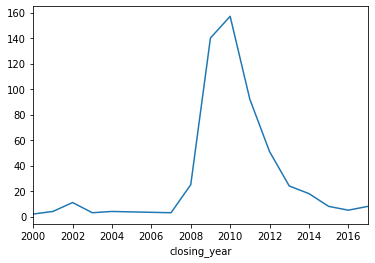

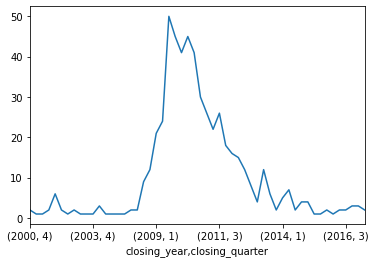

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [55]:
import pandas_datareader as pdr

ModuleNotFoundError: No module named 'pandas_datareader'